In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#load haberman.csv dataset and perform shape, columns and class analysis
hm = pd.read_csv('haberman.csv')



Haberman Dataset Informtion: This dataset contains the information of cases from a study conducted between 1958 and 1970 at University of Chicago Billings Hospital. This dataset contains information on survial of patients who had undergone a surgery for breast cancer.

Objective: Our objective is to do EDA (Exploratory Data Analysis) of Haberman dataset. With EDA, we have to analyse Habeman data set to summarise the following items:
    1. Haberman data set main characterstics like number of features, classes, data-points.
    2. Finding useful features for classification by performing Univariaite analysis (like PDF,CDF etc.) and BI-variate analysis(like scatter plots, pair-plots) to check combination of features are useful or not.

In [3]:
# haberman dataset have 4 features with 306 vectors/tuples/datapoits
hm.shape

(306, 4)

In [4]:
hm.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

Features Information:

1. age: Age of patient at the time of surgery 
2. year : Year of surgery
3. nodes : number of positive axillary nodes detected
4. status (class attribute) : patient survied or not --> 1 = the patient survived 5 years or more
                                                         2 = the patient survived less than 5 years

In [6]:
hm['status'].value_counts()
#There are two classes

1    225
2     81
Name: status, dtype: int64

haberman dataset is not balanced as the difference between datapoints in one class is approx 3 times of another class.

In [8]:
hm.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


# 2D SCATTER PLOT ANALYSIS:

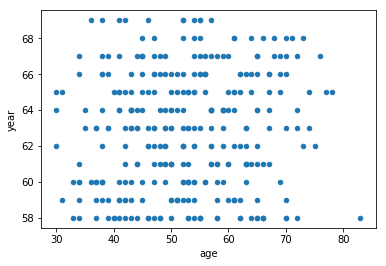

In [9]:
hm.plot(kind = 'scatter', x= 'age', y='year')
plt.show()
#without color coding dataset scatter plot is not making sense

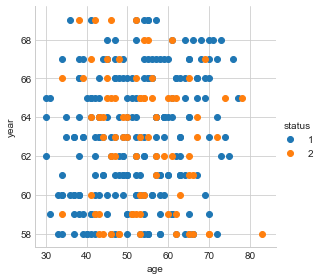

In [11]:
#2-D colored scatter plot using seaborn.

sns.set_style('whitegrid')
sns.FacetGrid(hm, hue = 'status', size = 4).map(plt.scatter, 'age', 'year').add_legend()
plt.show()

#here in dataset we have 3 feature we can combine them in 3c2 ways to draw a 2d plot for analysis.

Observation: 
1. Using age and year features, we can not distinguish between patient died before 5 years (status 1) and patient died after 5 years (status 2).
2. Here age vary from 30 years to 82 years approx and year from 58 to 70 as described in dataset information.

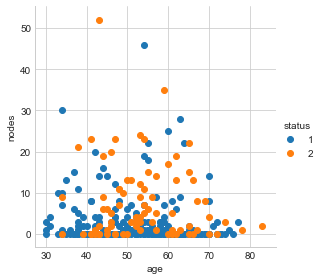

In [12]:
# let's take another combination of age and nodes (positive axillary nodes) features and draw 2D- scatter plot
sns.set_style('whitegrid')
sns.FacetGrid(hm, hue = 'status', size = 4).map(plt.scatter, 'age', 'nodes').add_legend()
plt.show()


Observations:
1. nodes value vary from 0 to 52 (approx) and age vary from 30 to 82.
2. Using age and nodes features, we can not distinguish between status 1 and status 2 because they are mixed too much as shown above and both classes 1 and 2 are overlapping as well.

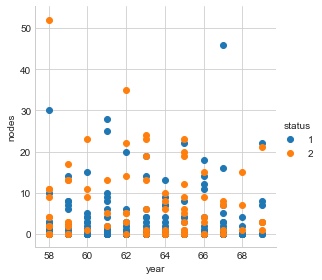

In [13]:
# let's take last combination of year and nodes (positive axillary nodes) features and draw 2D-scatter plot
sns.set_style('whitegrid')
sns.FacetGrid(hm, hue = 'status', size = 4).map(plt.scatter, 'year', 'nodes').add_legend()
plt.show()

Here also we are not able to get much difference between status 1 and status 2.

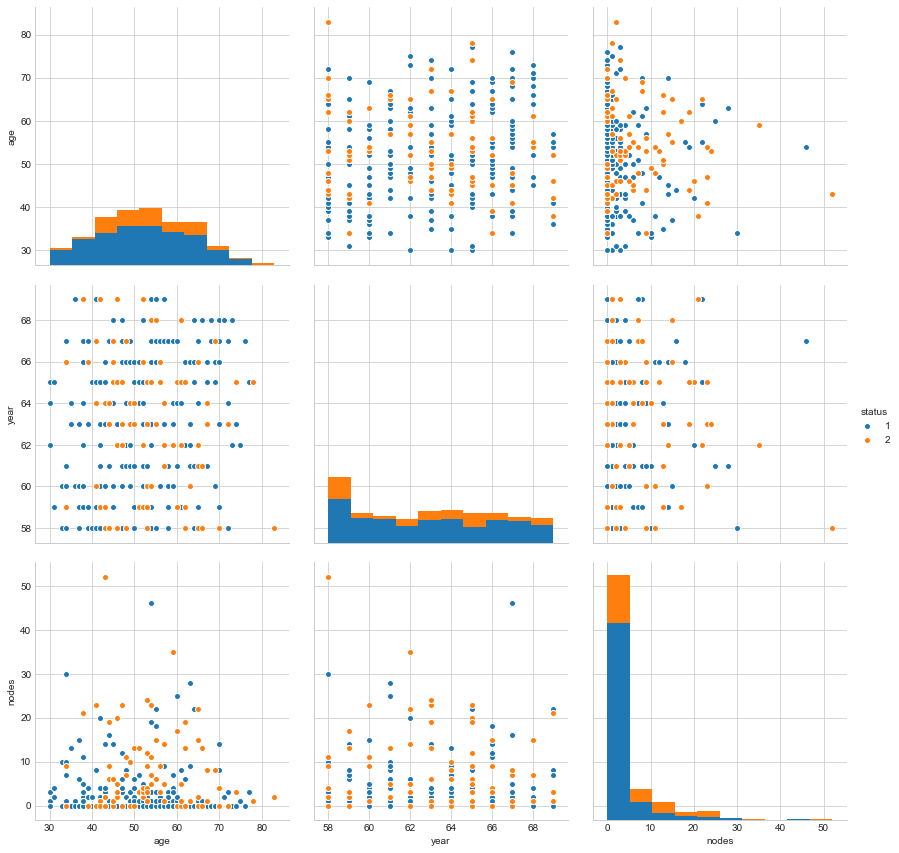

In [111]:
#we can draw pair-plot to see all combination at once (2-D Only)
plt.close()
sns.set_style("whitegrid")
sns.pairplot(hm, hue = "status", size=4, vars =['age', 'year', 'nodes'])
plt.show()

Observations:
1. We are not able to distinguish between status 1 and status 2 based on any 2-D combination of 3 features.

2. For most of the values of one of the features there is both status 1 and status 2 is identified (i.e overlapping class value). For example: for almost all expect 5-6 approx values of age,  status have both values 1 as well as 2. (This observation is equivalent to 1-D scatter plot using only one feature).

3. Feature combination age and nodes comparively good for classification with respect to other feature combinations.

Here combing features is not helpful for classification because we are not able to differetiate beytween classes by analysing.

# Histogram, PDF (Probability Density Function), CDF (Cumulative Distribution Function)F

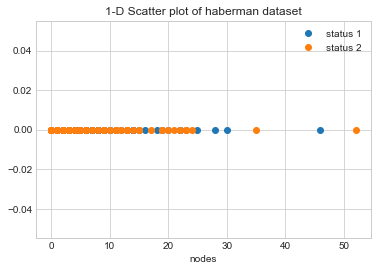

In [25]:
#1-D scatter plot using one feature.

hm_status1 = hm.loc[hm["status"] == 1] 
hm_status2 = hm.loc [ hm["status"] == 2]

plt.plot(hm_status1['nodes'], np.zeros_like(hm_status1['nodes']),'o',label = 'status 1')
plt.plot(hm_status2['nodes'], np.zeros_like(hm_status2['nodes']),'o',label = 'status 2')
plt.xlabel('nodes')
plt.title('1-D Scatter plot of haberman dataset')
plt.legend()
plt.show()



1.overlapping is too much as we can see below between status 1 and 2, hence we are not able to classif status 1 and 2 classes. 
2.On x-axis we have nodes ranging from 0 to 52 and y-asix is always 0 because we are ploting in 1-D. 

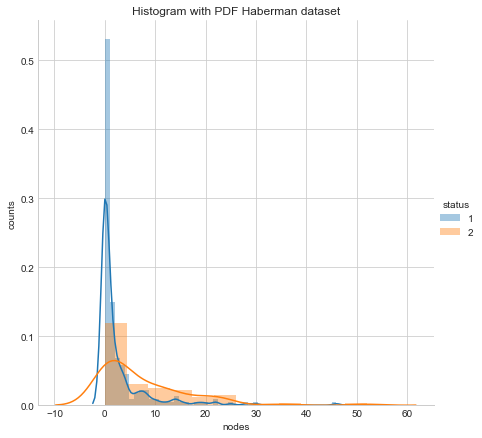

In [69]:
# histrograms with PDF
import warnings
warnings.filterwarnings("ignore")

sns.FacetGrid(hm, hue = "status", size =6)\
         .map(sns.distplot, "nodes")\
         .add_legend()
plt.title('Histogram with PDF Haberman dataset')
plt.ylabel('counts')
plt.show()

Observation: As we can see histogram plot is showing the overlap we had seen earlier with 2-D scatter plot or 1-D plot.
1. Here when number of nodes are <=2 there is a high probabilty of class 1 as shown by PDF plot and histogram plot. At nodes =0 Histogram value =0.53 (approx) and PDF smooth curve value = 0.3

2. As PDF curves for status 1 class and status 2 class are crossing each other at approx 2 or 3 and after that the status 2 class have higher density. Hence we can say that the probability of having class 2 when number of nodes are greater than 2 is more than class 1.

3. The highest number of nodes is approx 30, where probability of status 2 class (approx 0.02 )is slightly greater probabilty of class 1 (almost 0).

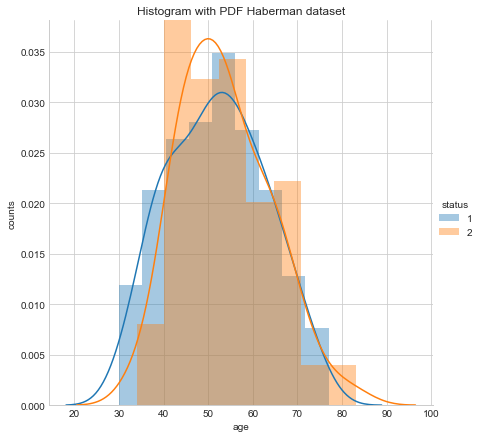

In [70]:
sns.FacetGrid(hm, hue = "status", size =6)\
         .map(sns.distplot, "age")\
         .add_legend()
plt.title('Histogram with PDF Haberman dataset')
plt.ylabel('counts')
plt.show()

Observation:  age of patient vary from 30 to 83.

1. Above PDF curve shows an overlap. Here if people age between 30-42 approx than there is a high probability of class 1.
2. Patient whose age vary between 42-58 approximately have higher chance of class 2.
3. We can see both the classes calss 1 and 2 have approx same probabilty when paitent age vary from 58 to 78 approx, post age =78 to 83 probablity of class2 is more than class 1 as shown by PDF curve.

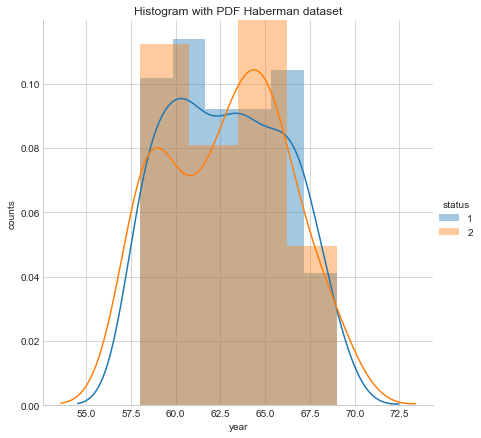

In [71]:
sns.FacetGrid(hm, hue = "status", size =6)\
         .map(sns.distplot, "year")\
         .add_legend()
plt.title('Histogram with PDF Haberman dataset')
plt.ylabel('counts')
plt.show()

1.In the above PDF curve with histogram on year attribute of haberman dataset, year varies from 1958 to 1969 approx.

2. Operation done from year 1958 to 1962 were successful means patient survived.

[0.18164251 0.0173913  0.00483092 0.0057971  0.00386473 0.00096618
 0.00193237 0.         0.         0.00096618]
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


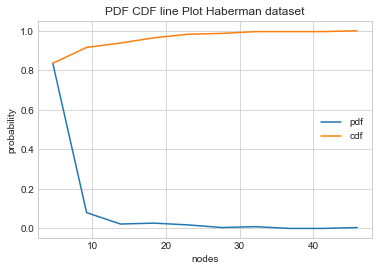

In [68]:
counts, bin_edges = np.histogram(hm_status1['nodes'], bins=10, 
                                 density = True)
print(counts)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:], cdf, label = 'cdf')
plt.xlabel('nodes')
plt.title('PDF CDF line Plot Haberman dataset')
plt.ylabel('probability')
plt.legend()



Observation: horizontal axis in above graph represnts 'nodes'.
There are around 92% data-points here that have  nodes <=10 (approx, observation by cdf and pdf line starting point).
There are approx 0.05% of points lies between nodes ==10 to 47 (approx) using PDF line. 




[0.00755858 0.02519526 0.04031242 0.04031242 0.02771479 0.02519526
 0.02015621 0.01007811 0.00503905 0.00251953]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


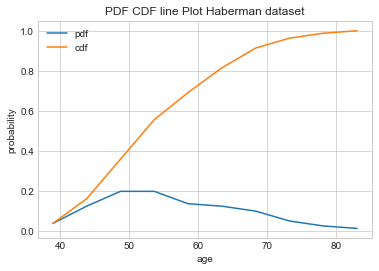

In [67]:
counts, bin_edges = np.histogram(hm_status2['age'], bins=10, 
                                 density = True)
print(counts)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:], cdf,label='cdf')
plt.title('PDF CDF line Plot Haberman dataset')
plt.xlabel('age')
plt.ylabel('probability')
plt.legend()

In above PDF, CDF plot horizontal axis is 'age' of paitent. We can see there are around 80% patient with age <= 64 by cdf plot.
By analysing PDF plot we can say taht aprrox 20% of paitents have their age between 47 to 55.

[0.18716578 0.08318479 0.07724302 0.06833036 0.08912656 0.09209745
 0.08318479 0.08318479 0.07427213 0.07130125]
[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


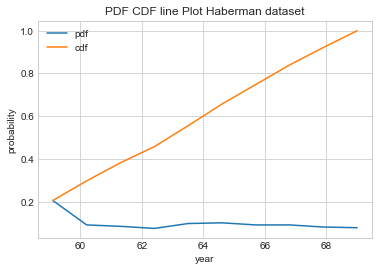

In [66]:
counts, bin_edges = np.histogram(hm['year'], bins=10
                                 , 
                                 density = True)
print(counts)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:], cdf,label='cdf')
plt.xlabel('year')
plt.ylabel('probability')
plt.title('PDF CDF line Plot Haberman dataset')
plt.legend()

In above PDF, CDF Plot horizontal access is year. We can see by PDF or CDf line most of the paitent operation is done in 1958. 

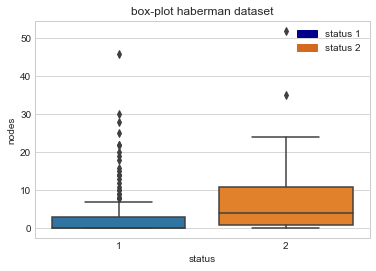

In [98]:
import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='teal', label='status 1')
orange_patch = mpatches.Patch(color='chocolate', label='status 2')
bp=sns.boxplot(x='status',y='nodes', data=hm)
plt.title('box-plot haberman dataset')
plt.legend(handles=[red_patch,orange_patch])
plt.show()

Observations:
1. Here for status 1, 25th and 50th percentile line lies at nodes = 0.Here 75th percentile value for nodes of status 1 class is three approximately.
2. if we put our threshold of number of nodes to 8 that is, if # nodes <=8 then status 1. With this condition we are having an overlap of more than 50% with status 2 (orange plot).



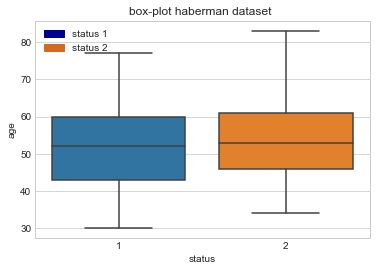

In [104]:
blue_patch = mpatches.Patch(color='teal', label='status 1')
orange_patch = mpatches.Patch(color='chocolate', label='status 2')
sns.boxplot(x='status',y='age', data=hm)
plt.title('box-plot haberman dataset ')
plt.legend(handles=[red_patch,orange_patch],loc="upper left")
plt.show()

In above box plot if we put condition : if age<=77 && age>30 than status 1, than this condition will overlap more than 75% of status 2 data-points as shown above.  

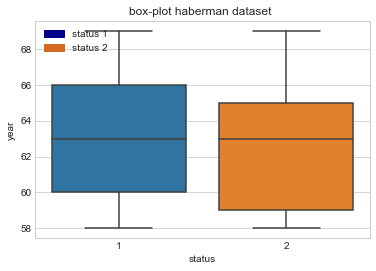

In [105]:
sns.boxplot(x='status',y='year', data=hm)
blue_patch = mpatches.Patch(color='teal', label='status 1')
orange_patch = mpatches.Patch(color='chocolate', label='status 2')
plt.title('box-plot haberman dataset ')
plt.legend(handles=[red_patch,orange_patch],loc="upper left")
plt.show()

As shown above with age as a classification parameter whiskers min and max for both status 1 and 2 class are almost equal. Hence paitent year operation is not an importent feature to classify.

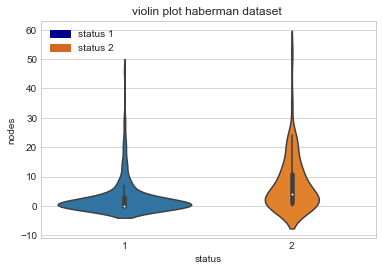

In [106]:
sns.violinplot(x="status", y="nodes", data=hm, size=20)
blue_patch = mpatches.Patch(color='teal', label='status 1')
orange_patch = mpatches.Patch(color='chocolate', label='status 2')
plt.legend(handles=[red_patch,orange_patch],loc="upper left")
plt.title('violin plot haberman dataset ')
plt.show()
#we can see the kind of overlapping as in box plot based on number of nodes for patients.

As we can see above patient with 0 or 1 nodes have higher chance of survival i.e. status 1. 
Patient with higher number of nodes (say greather than 5) have more chances of class 2 (i.e. not survived).

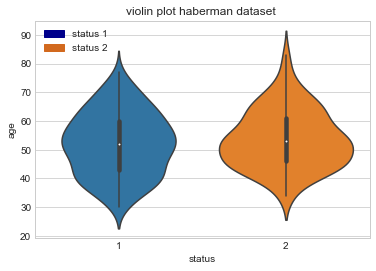

In [107]:
sns.violinplot(x="status", y="age", data=hm, size=20)
plt.title('violin plot haberman dataset ')
blue_patch = mpatches.Patch(color='teal', label='status 1')
orange_patch = mpatches.Patch(color='chocolate', label='status 2')
plt.legend(handles=[red_patch,orange_patch],loc="upper left")
plt.show()

Patients having their age between 45 to 53 approx have higher chance of not-surive (status 2).
paitent with age approx 53 to 56 have higher chance of survival (status 1).

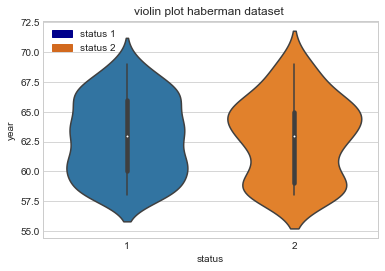

In [108]:
sns.violinplot(x="status", y="year", data=hm, size=20)
plt.title('violin plot haberman dataset ')
blue_patch = mpatches.Patch(color='teal', label='status 1')
orange_patch = mpatches.Patch(color='chocolate', label='status 2')
plt.legend(handles=[red_patch,orange_patch],loc="upper left")
plt.show()

Operation done in year 1960 to 1962 was having less chances of patient died (status 2).

Conclusion:
1. Haberman dataset is not balanced.

2. None of the combination of dataset features clearly seperate between two classes of patients.

3. Feature combination (age,nodes) comparively good for classification with respect to other feature combinations by looking at pair-plot.

4. Patients having positive axillary nodes>=2 have higher chance of non-survival and vice-versa (as we can see from Hist with PDF plot of 'nodes' feature and from Box-Plot).

5. Patient whose age vary between 42-58 approximately have higher chance of survival (Hist with PDF of 'age' feature). Also Patients of age less than 42 have higher chance of survival.

6. Patients whose operation done from 1958 to 1962 mostly survived.(Hist with PDF of 'year' feature).

 7. There are around 92% data-points here that have  nodes <=10 (approx, observation by cdf and pdf line curve for feature 'nodes').

8. With respect to feature importance we can say number of positive axillary 'nodes' detected is most important to classify, also age of patient also matters somewhat as younger patients .
